#### Import the required basic components to setup a Graph
- **START** : This is the starting point of Graph
- **END** : This is the ending point of Graph
- **StateGraph** : The nodes and edges were added using this to build a Graph.

In [1]:
from langgraph.graph import StateGraph, START, END

#### State

- This is the first thing to define while creating a Graph.
- State schema serves as an Input schema for all the Nodes and Edges in the Graph.

In [2]:
from typing import TypedDict

class State(TypedDict):
    g_state : str
    age : int

#### Nodes

- **Nodes** are the python functions and they are operated on the State.
- By default, each node will override the previous state value

In [3]:
def node1(state: State):
    state["g_state"] = f"Hello {state['g_state']}"
    return state

In [4]:
def node2(state: State):
    state["g_state"] = f"{state['g_state']}. Redirecting to fill the Voting Application !"
    return state

In [5]:
def node3(state: State):
    state["g_state"] = f"{state['g_state']}. You are not eligible for Voting !"
    return state

In [6]:
def node4(state: State):
    state["g_state"] = f"{state['g_state']}. Age Limit Exceeded !"
    return state

#### Edges
Edges are of two types

- **Normal** : These are connected to the other node without any connection
- **Conditional Edge** : These are connected to the other nodes with a condition

In [7]:
from typing import Literal

def conditional_edge(state: State) -> Literal["node2", "node3", "node4"]:
    
    age = state["age"]
    if(age in range(1, 18)):
        return "node3"
    elif(age in range(18, 121)):
        return "node2"
    else:
        return "node4"

In [8]:
graph_builder = StateGraph(State)

In [9]:
graph_builder.add_node("node1", node1)
graph_builder.add_node("node2", node2)
graph_builder.add_node("node3", node3)
graph_builder.add_node("node4", node4)

In [10]:
from IPython.display import Image, display

def get_graph(graph: StateGraph):
    voting_graph = graph.compile()
    return voting_graph, Image(voting_graph.get_graph().draw_mermaid_png())

In [11]:
graph_builder.add_edge(START, "node1")

In [12]:
graph_builder.add_conditional_edges("node1", conditional_edge)

In [13]:
graph_builder.add_edge("node2", END)
graph_builder.add_edge("node3", END)
graph_builder.add_edge("node4", END)

In [14]:
voting_graph, img = get_graph(graph_builder)

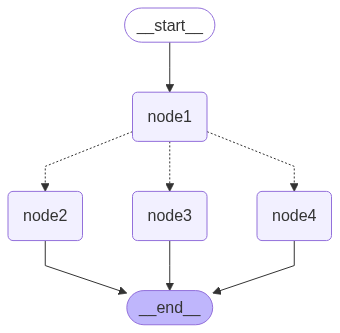

In [15]:
display(img)

In [16]:
voting_graph.invoke({"g_state" : "Vamsi", "age" : 18})

{'g_state': 'Hello Vamsi. Redirecting to fill the Voting Application !',
 'age': 18}

In [17]:
voting_graph.invoke({"g_state" : "Krishna", "age" : 17})

{'g_state': 'Hello Krishna. You are not eligible for Voting !', 'age': 17}

In [18]:
voting_graph.invoke({"g_state" : "Vamsi Krishna", "age" : 200})

{'g_state': 'Hello Vamsi Krishna. Age Limit Exceeded !', 'age': 200}